<a href="https://colab.research.google.com/github/limlimlim99/limjihyeonjjang/blob/main/pt1_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent확률적 경사하강법)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


In [ ]:
import torch
torch.__version__

'1.13.0+cu116'

# 텐서 초기화 데이터 타입

초기화되지 않은 텐서

In [ ]:
x = torch.empty(4,2)
print(x)

tensor([[9.8033e-37, 0.0000e+00],
        [1.4714e-43, 1.5414e-43],
        [1.6255e-43, 5.6052e-44],
        [1.5554e-43, 1.6395e-43]])


In [ ]:
import numpy as np
x = np.empty([4,2])
print(x)

[[531.23478261   7.2       ]
 [673.04347826   7.2       ]
 [531.23478261 149.00869565]
 [673.04347826 149.00869565]]


무작위로 초기화된 텐서

In [ ]:
x = torch.rand(4,2)
print(x)

# 0~1사이의 숫자를 균등하게 생성(랜덤)

tensor([[0.1208, 0.4160],
        [0.9867, 0.2039],
        [0.5028, 0.0107],
        [0.3310, 0.1062]])


데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [ ]:
x = torch.zeros(4,2,dtype=torch.long)
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [ ]:
x = torch.tensor([3,2.3])
print(x)

tensor([3.0000, 2.3000])


2 X 4 크기, double 타입, 1로 채워진 텐서

In [ ]:
x = x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


X와 같은 크기, float 타입, 무작위로 채워진 텐서

In [ ]:
x = torch.rand_like(x, dtype=torch.float)
print(x)

# 사이즈를 튜플로 입력하지 않고 기존의 텐서를 정의

tensor([[0.6214, 0.2452, 0.6890, 0.7695],
        [0.1577, 0.5448, 0.6867, 0.6650]])


In [ ]:
x = torch.randn(5) 
print(x)

# 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성
# 생성한 값으로 다시 평균, 표준편차를 만들어 0과 1로 만들 수 있나? => X
# 샘플수를 늘릴수록 모오수에 가까워짐
# 표본을 잘 잡아야함~

tensor([-2.0326, -0.5859, -1.5487, -0.7367, -0.1460])


텐서의 크기 계산

In [ ]:
print(x.size())

torch.Size([5])


# 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


- 몇 비트인지 보기
- float : 32
- double : 64
- half : 16

In [ ]:
ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [ ]:
print(ft.short())
print(ft.int())
print(ft.long())

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [ ]:
it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


# CUDA Tensor
- .to 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

- NVIDIA가 만든 병렬 컴퓨팅 플랫폼 및 API 모델로, 보통 '쿠다'라고 발음한다. CUDA 플랫폼은 GPU 의 가상 명령어셋을 사용할 수 있도록 만들어주는 소프트웨어 레이어이며, NVIDIA가 만든 CUDA 코어가 장착된 GPU에서 작동


In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.2748])
-0.2748029828071594
torch.float32


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# cuda를 이용할 수 있으면 cuda
# 아니면 cpu
# 런타임 유형을 None으로 하면 cpu가 나오고
# gpu로 설정하면 cuda가 나옴

cuda


# 다차원 텐서 표현

0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [ ]:
t0 = torch.tensor(0)

print(t0.ndim)
print(t0.shape)
print(to)

0
torch.Size([])


NameError: ignored

# 1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [ ]:
t1 = torch.tensor([1,2,3])

print(t1.ndim)
print(t1.shape)
print(t1)

# 2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

In [ ]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6]])

print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


# 3D Tensor
- 큐브(cube)와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병

In [ ]:
t3 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])

print(t3.ndim)
print(t3.shape)
print(t3)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


# 4D Tensor

In [ ]:
t4 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9],
                   [10,11,12]])

print(t4.ndim)
print(t4.shape)
print(t4)

2
torch.Size([4, 3])
tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])


# 텐서의 연산(Operations)
- 텐서에 대한 수학 연산, 삼각함수, 비트연산, 비교연산, 집계 등 제공

In [ ]:
import math

a = torch.rand(1,2) * 2 -1 #가우시안 표준정규 분포
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.clamp(a, -0.5, 0.5))

# 즉 입력값이 min < x(input) < max 이면 x가 그대로 나오지만
# min보다 작으면 min값이, max보다 크면 max값이 나오는 구조입니다!

tensor([[ 0.0456, -0.3807]])
tensor([[0.0456, 0.3807]])
tensor([[1., -0.]])
tensor([[ 0.0456, -0.3807]])


In [ ]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))  # unique: 중복된 값을 뺌

tensor([[ 0.0456, -0.3807]])
tensor(-0.3807)
tensor(0.0456)
tensor(-0.1675)
tensor(0.3014)
tensor(-0.0174)
tensor([1, 2, 3])


max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax : 최대 값을 가진 인덱스
- argmin : 최소값을 가진 인덱스

In [ ]:
x = torch.rand(2,2)
print(x, '\n')
print(x.max(dim=0), '\n')   
print(x.max(dim=1))

# 행쪽으로 보는 것(dim=0) 세로로 비교해서 큰 값
# 열쪽으로 보는 것(dim=1) 가로로 비교해서 큰 값

tensor([[0.1695, 0.0181],
        [0.7082, 0.3709]]) 

torch.return_types.max(
values=tensor([0.7082, 0.3709]),
indices=tensor([1, 1])) 

torch.return_types.max(
values=tensor([0.1695, 0.7082]),
indices=tensor([0, 0]))


In [ ]:
x = torch.rand(2,2)
print(x, '\n')
print(x.min(dim=0), '\n')
print(x.min(dim=1))

# 행쪽으로 보는 것(dim=0) 세로로 비교해서 작은 값
# 열쪽으로 보는 것(dim=1) 가로로 비교해서 작은 값

tensor([[0.5345, 0.0109],
        [0.8410, 0.5968]]) 

torch.return_types.min(
values=tensor([0.5345, 0.0109]),
indices=tensor([0, 0])) 

torch.return_types.min(
values=tensor([0.0109, 0.5968]),
indices=tensor([1, 1]))


In [ ]:
x = torch.rand(2,2)
print(x)
y = torch.rand(2,2)
print(y)

tensor([[0.1382, 0.6159],
        [0.6972, 0.4108]])
tensor([[0.9052, 0.6081],
        [0.7169, 0.7601]])


torch.add : 덧셈

In [ ]:
print(x+y)
print(torch.add(x,y))

tensor([[1.0434, 1.2241],
        [1.4141, 1.1709]])
tensor([[1.0434, 1.2241],
        [1.4141, 1.1709]])


결과 텐서를 인자로 제공

In [ ]:
result = torch.empty(2,4)
torch.add(x,y, out=result)
print(result)

tensor([[1.0434, 1.2241],
        [1.4141, 1.1709]])


<ipython-input-100-4be145b6d329>:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at ../aten/src/ATen/native/Resize.cpp:17.)
  torch.add(x,y, out=result)


# in-place방식
- in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _"가 붙음
- x.copy_(y), x.t_()
- inplac = True방식과 똑같음
- _" 줄이 inplace=True임 => 바뀐 것으로 저장됨

In [ ]:
print(x)
print(y)
print()
y.add_(x)
print(y)

# y에다가 x를 더한 값을 y에다가 넣는다. y에 저장(x+y=y) y값이 x가 추가된 값으로 변경됨

tensor([[0.1382, 0.6159],
        [0.6972, 0.4108]])
tensor([[0.9052, 0.6081],
        [0.7169, 0.7601]])

tensor([[1.0434, 1.2241],
        [1.4141, 1.1709]])


torch.sub: 뺄셈

In [ ]:
print(x)
print(y)
print() 
print(x-y, '\n') # 새로 x값이 됨
x.sub_(y)  # x값이 저장됨
print(x)
print()
print(torch.sub(x,y))
print(x.sub(y))

tensor([[0.1382, 0.6159],
        [0.6972, 0.4108]])
tensor([[1.0434, 1.2241],
        [1.4141, 1.1709]])

tensor([[-0.9052, -0.6081],
        [-0.7169, -0.7601]]) 

tensor([[-0.9052, -0.6081],
        [-0.7169, -0.7601]])

tensor([[-1.9486, -1.8322],
        [-2.1309, -1.9309]])
tensor([[-1.9486, -1.8322],
        [-2.1309, -1.9309]])


torch.mul : 곱셈

In [ ]:
print(x)
print(y)
print()
print(x*y) # 새로 x값이 됨
x.mul_(y) # x값이 저장됨
print(x)
print()
print(torch.mul(x,y))
print(x.mul(y))

tensor([[-0.9052, -0.6081],
        [-0.7169, -0.7601]])
tensor([[1.0434, 1.2241],
        [1.4141, 1.1709]])

tensor([[-0.9445, -0.7444],
        [-1.0137, -0.8899]])
tensor([[-0.9445, -0.7444],
        [-1.0137, -0.8899]])

tensor([[-0.9855, -0.9112],
        [-1.4334, -1.0420]])
tensor([[-0.9855, -0.9112],
        [-1.4334, -1.0420]])


torch.div : 나눗셈

In [ ]:
print(x)
print(y)
print()
print(x/y) # 새로 x값이 됨
x.div_(y) # x값이 저장됨
print(x)
print()
print(torch.div(x,y))
print(x.div(y))

tensor([[-0.9445, -0.7444],
        [-1.0137, -0.8899]])
tensor([[1.0434, 1.2241],
        [1.4141, 1.1709]])

tensor([[-0.9052, -0.6081],
        [-0.7169, -0.7601]])
tensor([[-0.9052, -0.6081],
        [-0.7169, -0.7601]])

tensor([[-0.8675, -0.4968],
        [-0.5070, -0.6492]])
tensor([[-0.8675, -0.4968],
        [-0.5070, -0.6492]])


torch.mm : 내적(dot product)

In [ ]:
print(x)
print(y)
print()
print(torch.matmul(x,y))
z = torch.mm(x,y)
print(z)
print(torch.svd(z))  # singualr value decomposition A = U 시그마 VT
# (v의 전치 행렬)  (분리)
# 텐서별로 분리
# 행렬 분해 = 거꾸로 하는 것이다.

tensor([[-0.9052, -0.6081],
        [-0.7169, -0.7601]])
tensor([[1.0434, 1.2241],
        [1.4141, 1.1709]])

tensor([[-1.8044, -1.8201],
        [-1.8228, -1.7675]])
tensor([[-1.8044, -1.8201],
        [-1.8228, -1.7675]])
torch.return_types.svd(
U=tensor([[-0.7104, -0.7038],
        [-0.7038,  0.7104]]),
S=tensor([3.6075, 0.0356]),
V=tensor([[ 0.7110, -0.7032],
        [ 0.7032,  0.7110]]))


# 텐서의 조작(MainPulations)

인덱싱(indexing): NumPy처럼 인덱싱 형태로 사용가능

In [ ]:
import torch
x = torch.Tensor([[1,2], [3,4]])
print(x)

print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1])
print(x[:,0])
print(x[:,0])
print(x[0,:])
print(x[1,:])


tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.)
tensor([1., 3.])
tensor([1., 3.])
tensor([1., 2.])
tensor([3., 4.])


https://bigdatadiary0819.tistory.com/60

º 랜덤한 값을 가지는 텐서 생성

1. torch.rand() : 0과 1 사이의 숫자를 균등하게 생성

2. torch.rand_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

3. torch.randn() : 평균이 0이고 표준편차가 1인 가우시안 정규분포를 이용해 생성

4. torch.randn_like() :  사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.randint() : 주어진 범위 내의 정수를 균등하게 생성

6. torch.randint_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

7. torch.randperm() : 주어진 범위 내의 정수를 랜덤하게 생성 

º 특정한 값을 가지는 텐서 생성

1. torch.arange() : 주어진 범위 내의 정수를 순서대로 생성

2. torch.ones() : 주어진 사이즈의 1로 이루어진 텐서 생성

3. torch.zeros() : 주어진 사이즈의 0으로 이루어진 텐서 생성

4. torch.ones_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

5. torch.zeros_like() : 사이즈를 튜플로 입력하지 않고 기존의 텐서로 정의

6. torch.linspace() : 시작점과 끝점을 주어진 갯수만큼 균등하게 나눈 간격점을 행벡터로 출력(x 만들때 쓰임)

7. torch.logspace() : 시작점과 끝점을 주어진 갯수만큼 로그간격으로 나눈 간격점을 행벡터로 출력

(로그의 특징: 지수함수, 로그함수: 역의 관계)

view : 텐서의 크기(size)나 모양(shape)을 변경
- 기본적으로 변경 전과 후의 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기 값을 유추(reshape와 같음)

In [ ]:
import torch
x = torch.randn(4,5)  # 4행 5열
print(x)
print(x.shape)
print(x.size())   #괄호를 유의해야 함 # shape랑 size는 같은 의미로 쓰인다~

tensor([[-0.3371, -0.5770,  1.5773, -0.2271,  0.1725],
        [ 0.0711,  0.7247,  0.1118,  0.2563,  1.0262],
        [-0.4919,  1.2012, -1.0549, -0.6227, -1.3279],
        [ 0.0923,  0.6308, -1.4155,  1.7763, -1.3888]])
torch.Size([4, 5])
torch.Size([4, 5])


In [ ]:
x = torch.FloatTensor([
    [1,2],
    [3,4],
    [5,6],
    [7,8]
])

# size를 활용한 텐서 사이즈 보기
print(x.size())
# shape를 활용한 텐서 사이즈 보기
print(x.shape)
# dim을 활용한 텐서 사이즈 보기
print(x.dim())
# 1차원 사이즈 확인
print(x.size(0))
# 1차원 사이즈 확인
print(x.shape[0])

torch.Size([4, 2])
torch.Size([4, 2])
2
4
4


In [ ]:
x = torch.randn(4,5)
print(x)
print()
y = x.view(20)  # 20개를 써서 1차원으로 바뀜
print(y)
z = x.view(5,-1)
print(z)

tensor([[-0.7435,  0.1677,  0.5782,  0.2918, -0.2870],
        [-0.0082,  1.1824,  0.4463, -0.3075,  1.0615],
        [-2.2091,  0.7562, -0.2275,  0.5456, -1.1088],
        [-0.0683,  1.1980,  0.0299,  0.8945, -1.5537]])

tensor([-0.7435,  0.1677,  0.5782,  0.2918, -0.2870, -0.0082,  1.1824,  0.4463,
        -0.3075,  1.0615, -2.2091,  0.7562, -0.2275,  0.5456, -1.1088, -0.0683,
         1.1980,  0.0299,  0.8945, -1.5537])
tensor([[-0.7435,  0.1677,  0.5782,  0.2918],
        [-0.2870, -0.0082,  1.1824,  0.4463],
        [-0.3075,  1.0615, -2.2091,  0.7562],
        [-0.2275,  0.5456, -1.1088, -0.0683],
        [ 1.1980,  0.0299,  0.8945, -1.5537]])


item : 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.9977])
0.9977027773857117
torch.float32


squeeze : 차원을 축소(제거)

In [ ]:
tensor = torch.randn(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[ 0.3311,  0.2357, -0.7422],
         [-0.4071,  0.0091,  0.5020],
         [ 0.3928, -0.2788,  1.2758]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[ 0.3311,  0.2357, -0.7422],
        [-0.4071,  0.0091,  0.5020],
        [ 0.3928, -0.2788,  1.2758]])
torch.Size([3, 3])


In [ ]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.3032, 0.0118, 0.9581],
        [0.0024, 0.0739, 0.5444],
        [0.6083, 0.8624, 0.0995]])
torch.Size([3, 3])


unsqueeze : 차원을 증가(생성)

In [ ]:
tensor = t.unsqueeze(dim = 0)
print(tensor)
print(tensor.shape)

# dim을 주면 의도한 차원의 값이 하나 더 늘어남

tensor([[[0.3032, 0.0118, 0.9581],
         [0.0024, 0.0739, 0.5444],
         [0.6083, 0.8624, 0.0995]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = tensor.unsqueeze(dim = 2)
print(tensor)
print(tensor.shape)

# dim을 주면 의도한 차원의 값이 하나 더 늘어남

tensor([[[[0.3032, 0.0118, 0.9581]],

         [[0.0024, 0.0739, 0.5444]],

         [[0.6083, 0.8624, 0.0995]]]])
torch.Size([1, 3, 1, 3])


stack : 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)
print(torch.stack([x,y,z]))

# stack을 써서 하나로 합쳐짐

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat: 텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack 과 유사하지만 쌓을 dim이 존재함
- 해당 차원을 늘려준 후 결합

In [ ]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
print()

c = torch.cat((a,b), dim=0)
print(c)
print(c.size())



# 1,3,3
# 1,3,3
# dim=0을 줘서 (1,1) 0번째를 기준으로

tensor([[[-0.6515,  1.2652, -0.1852],
         [-0.6343, -0.3262, -1.5402],
         [ 0.5899,  2.0249, -0.8032]]])
tensor([[[-0.9081,  2.3630,  0.0733],
         [-1.0749,  0.2184, -2.3413],
         [-0.5024,  0.3610, -0.0797]]])

tensor([[[-0.6515,  1.2652, -0.1852],
         [-0.6343, -0.3262, -1.5402],
         [ 0.5899,  2.0249, -0.8032]],

        [[-0.9081,  2.3630,  0.0733],
         [-1.0749,  0.2184, -2.3413],
         [-0.5024,  0.3610, -0.0797]]])
torch.Size([2, 3, 3])


In [ ]:
c = torch.cat((a,b), dim=1)
print(c)
print(c.size())


# 안으로 다 합쳐짐
# dim=1로 해서 행이 6행이 됨
# dim을 어떻게 주냐에 따라 달라짐



# 1,3,3
# 1,3,3
# dim=1을 줘서 (3,3) 1번째를 기준으로

tensor([[[-0.6515,  1.2652, -0.1852],
         [-0.6343, -0.3262, -1.5402],
         [ 0.5899,  2.0249, -0.8032],
         [-0.9081,  2.3630,  0.0733],
         [-1.0749,  0.2184, -2.3413],
         [-0.5024,  0.3610, -0.0797]]])
torch.Size([1, 6, 3])


chunk : 텐서를 여러개로 나눌 때 사용(몇개로 나눌 것인가?)
- 열 방향으로 최대 2개를 가짐

In [ ]:
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.5327, 0.5940, 0.5142, 0.2483, 0.2170, 0.4390],
        [0.6172, 0.8344, 0.8882, 0.3892, 0.5088, 0.1790],
        [0.7885, 0.7034, 0.1493, 0.9865, 0.5361, 0.3277]])
tensor([[0.5327, 0.5940],
        [0.6172, 0.8344],
        [0.7885, 0.7034]])
tensor([[0.5142, 0.2483],
        [0.8882, 0.3892],
        [0.1493, 0.9865]])
tensor([[0.2170, 0.4390],
        [0.5088, 0.1790],
        [0.5361, 0.3277]])


split : chunk와 동일한 기능이지만 조금 다름(텐서의 크기는 몇인가?)

In [ ]:
tensor = torch.rand(3,6)
print(tensor)

t1,t2,t3 = torch.split(tensor, 2, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.3167, 0.6892, 0.8769, 0.5045, 0.5385, 0.0016],
        [0.2013, 0.6314, 0.3877, 0.7932, 0.1027, 0.5979],
        [0.6254, 0.6698, 0.3798, 0.0630, 0.7205, 0.0028]])
tensor([[0.3167, 0.6892],
        [0.2013, 0.6314],
        [0.6254, 0.6698]])
tensor([[0.8769, 0.5045],
        [0.3877, 0.7932],
        [0.3798, 0.0630]])
tensor([[0.5385, 0.0016],
        [0.1027, 0.5979],
        [0.7205, 0.0028]])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - Numpy()
  - from_numpy()
- Tensor가 CPU상에 있다면 Numpy 배열은 메모리 공간을 공유 하므로 하나가 변하면, 다른 하나도 변함

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [ ]:
print(a.to('cpu', torch.double))  
print(type(a))

# GPU: 게임 개발(단순작업, 많은 것을 할 때 유리, 영상, 이미지)
# CPU: 복잡한 것을 할 때 유리(창의적인것은 유리하지만 반복은 불리함)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


In [ ]:
b = a.numpy()
print(b)
print(type(b))

# a를 numpy를 써서 배열로 변환 b로 저장 

[1. 1. 1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
a.add_(1) # a값에 1을 더해줌
print(a)
print(type(a))
print(b)
print(type(b))

# 1에다 1을 더해서 =2, torch.tensor
# b는 numpy

tensor([2., 2., 2., 2., 2., 2., 2.])
<class 'torch.Tensor'>
[2. 2. 2. 2. 2. 2. 2.]
<class 'numpy.ndarray'>


In [ ]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)  # a에 1을 더해서 a를 출력
print(a)
print(b)  #cpu에서 메모리 공유

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
b = b.numpy()
np.add(b,2,out=b)

array([4., 4., 4., 4., 4., 4., 4.])

역전파 / 경사하강법
- 
https://velog.io/@ssulee0206/%EC%97%AD%EC%A0%84%ED%8C%8C-%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95

AutoGrad(자동미분)
- torch.autograd 패키지는 Tensor의 모든 연산에 대한 자동미분 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop 를 위해 미분값을 자동으로 계산


TORCH.AUTOGRAD를 사용한 자동 미분
- https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html
- loss값이 너무 크면(만족을 못하면) 역전파

requires_grad 속성을 True로 설정하면, 해당 탠서에서 이루어지는 모든 연산들을 추적하기 시작
기록을 추적하는 것은 중단하게 하려면, .detach()를 호출하여 연산기록으로부터 분리

In [ ]:
import torch
a = torch.randn(3,3)
# ,requiress_grad=True
a = a * 3
print(a)
print(a.requires_grad)

tensor([[-5.9993e+00,  4.7326e-03,  1.1765e+00],
        [ 3.8428e-01,  8.5063e-01, -7.4260e-01],
        [ 5.0720e+00,  2.2595e+00,  4.9924e-01]])
False


- requires_grad_(...)는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)

In [ ]:
a.requires_grad_(True)  #_를 사용하면 inplace 연산. 바꾼 값으로 계산
print(a.requires_grad)
b = (a*a).sum()
print(b)
print(b.grad_fn)


# 기억한 것을 출력

True
tensor(69.8791, grad_fn=<SumBackward0>)


# 기울기 (Gradient)

In [ ]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [ ]:
print(x + 3)
print(y * 1)
y.mean()
z

tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]], grad_fn=<AddBackward0>)
tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>)

계산이 완료된 후, .backward()를 호출하면 자동으로 역전파 계산이 가능하고, .grad속성에 누적됨
- backward하는 이유 : 손실함수를 만족하지 못해서 개선가능하지 않을 때 까지 실행 가능

In [ ]:
print(out)
out.backward()  #backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


grad : data가 거쳐온 layer에 대한 미분값 저장

In [ ]:
print(x)
print(x.grad)  #미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [ ]:
x = torch.randn(3, requires_grad=True)
y = x *2
while y.data.norm() < 1000:
  y = y * 2
print(y)

tensor([ 170.4538, -531.4327,  861.4753], grad_fn=<MulBackward0>)


In [ ]:
# v 기준으로 backward 계산
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

# x의 미분값을 구하는 (역전파)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


In [ ]:
v
# v를 기준으로 역전파
# 인위적으로 만들어서 해본 것임

tensor([1.0000e-01, 1.0000e+00, 1.0000e-04])

with torch.no_grad()를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 with torch.no_grad()로 감싸면 기울기 계산은 필요 없지만, require_grad=True로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

-평가를 할때는 학습데이터로 기울기를 업데이트 하면 안됨
- 업데이트 되지 않기 위해 with torch.no_grad()로 감싸면 업데이트가 안됨

In [ ]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x **2).requires_grad)

True
True
False


detach(): 내용물(content)은 같지만 require_grad가 다른 새로운 Tensor를 가져올 때

In [ ]:
print(x.requires_grad)
y = x.detach()   #끊어줌
print(y.requires_grad)
print(x)
print(y)
#print(x.eq(y).all())

# x는 출력이 되지만 y는 안나옴

True
False
tensor([ 0.3329, -1.0380,  1.6826], requires_grad=True)
tensor([ 0.3329, -1.0380,  1.6826])


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


- backwar를 통해 미분값이 a.grad에 채워짐
- out에는 없음 a에 채워짐

In [ ]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [ ]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

# 계산 한 것이 아무것도 없어서 None으로 나옴
# a.grad는 있음

tensor([[1., 1.],
        [1., 1.]])
None
None


### b = a + 2

In [ ]:
b = a + 2
print(b)


tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


### c = b**2

In [ ]:
c = b**2
c

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)

In [ ]:
out = c.sum()
out

tensor(36., grad_fn=<SumBackward0>)

In [ ]:
print(out)
out.backward()   #미분값이 a.grad에 채워진거일뿐 따로 backward를 해야함

tensor(36., grad_fn=<SumBackward0>)


a의 grad_fn이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

In [ ]:
print(a.data)
print(a.grad)
print(a.grad_fn)

# out.backward()를 한 후 보면 a.grad가 채워져있는 것을 볼 수 있음

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None


In [ ]:
print(b.data)
print(b.grad)
print(b.grad_fn)

tensor([[3., 3.],
        [3., 3.]])
None


<ipython-input-149-7222c1aec66c>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(b.grad)


In [ ]:
print(c.data)
print(c.grad)
print(c.grad_fn)

tensor([[9., 9.],
        [9., 9.]])
None


<ipython-input-150-f6ca42a4f63f>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:480.)
  print(c.grad)


### Fashion MNIST분류모델

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

데이터 로드

In [ ]:
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))]) # 평균, 표준편차

In [ ]:
trainest = datasets.FashionMNIST(root = '/content/',
                                 train=True, download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root='/content',
                                 train=False, download=True,
                                 transform = transform)

In [ ]:
!ls

drive  FashionMNIST  fasion_mnist.pth  sample_data


In [ ]:
train_loader = DataLoader(trainest, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [ ]:
# iter는 반복 가능한 객체에서 이터레이터를 반환하고, next는 이터레이터에서 값을 차례대로 꺼냄
images, labels = next(iter(train_loader)) # 데이터의 접근하려면 python의 내장함수 iter와 next을 사용하여 접근
images.shape, labels.shape   #꺼내서 이미지, 레이블에 담아줌
# 128: batch_size

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

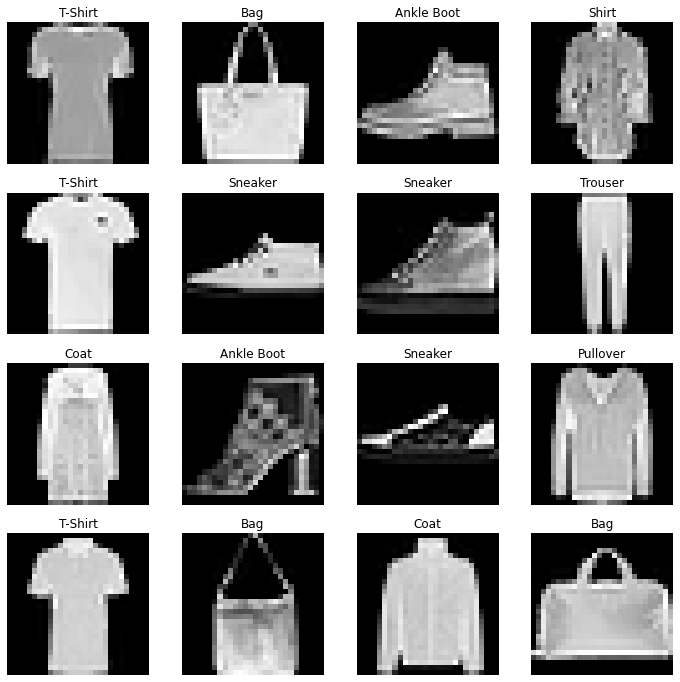

In [ ]:
import matplotlib.pyplot as plt
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot',

}
figure = plt.figure(figsize=(12,12))
cols, rows =4,4
for i in range(1, cols * rows +1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')
plt.show()

### 모델 정의 및 파라미터

dilation은 kernel의 한 픽셀에서 다른 픽셀까지의 거리를 나타냅니다.

Linear
- 선형 계층은 저장된 가중치와 편향을 사용하여 입력에 선형 변환을 적용하는 모듈

nn.ReLU
- 비선형 활성화는 모델의 입력과 출력 사이에 복잡한 관계를 만든다. 비선형 변환 후에 적용되어 비선형을 도입하고 신경망이 다양한 현상을 학습할 수 있도록 만든다.

https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

모델 정의 및 파라미터

In [ ]:
from torch import nn
from torch.nn import functional as f
class net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv2d_32 = nn.Conv2d(1,32,3,padding=1)
    self.conv2d_64 = nn.Conv2d(32,64,3,padding=1)
    self.max2d = nn.MaxPool2d(2,2)
    self.conv2d_128 = nn.Conv2d(64, 128,3,padding=1)
    self.conv2d_256 = nn.Conv2d(128, 256, 3,stride=2,padding=1)
    self.linear1 = nn.Linear(3*3*256, 256)
    self.linear2 = nn.Linear(256, 64)
    self.linear3 = nn.Linear(64, 10)
    self.batch2d1 = nn.BatchNorm2d(64)   #배치별로 normalize해줌(정규화)하면서 scale이 달라짐
    self.batch2d2 = nn.BatchNorm2d(256)  
    self.batch1d = nn.BatchNorm1d(64)
    self.drop = nn.Dropout(p=0.3)
    self.flat = nn.Flatten()

  def forward(self,x):
    x = x.view(-1,1,28,28)  #차원을 줄여줌 # 1,28,28은 지키고 나머진 -1이 알아서 처리해줌
    x = f.relu(self.conv2d_32(x)) #선형변환 -> 비선형변환(relu)
    x = f.relu(self.conv2d_64(x))
    x = self.batch2d1(x)         #배치별로 normalize해줌
    x = f.relu(self.max2d(x))   
    x = self.drop(x)

    x = f.relu(self.conv2d_128(x))    
    x = f.relu(self.conv2d_256(x))          
    x = self.drop(x)
    x = f.relu(self.max2d(x))
    x = self.drop(x)

    x = self.flat(x)               #flatten해서 완전연결층 위의 2개는 conv층, 마지막층은 완전연결층
    x = f.relu(self.linear1(x))   #선형변환
    x = self.drop(x)
    x = f.relu(self.linear2(x))
    x = self.drop(x)
    x = self.batch1d(x)
    x = f.log_softmax(self.linear3(x), dim=1)   # return(x)는 softmax => 10개의 확률이 나옴 => 확률이 가장 높은것으로 분류
    return(x)
    
net = net()
print(net)

net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
)


In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

20
torch.Size([32, 1, 3, 3])


https://tutorials.pytorch.kr/beginner/basics/buildmodel_tutorial.html

### 손실함수와 옵티마이저

In [ ]:
critertion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.008)

### 모델 학습

배치수 확인

In [ ]:
total_batch = len(train_loader)
print(total_batch)


# batchsize 128 /60000

469


### zero_grad()

보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데, 한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.


In [ ]:
for epoch in range(10):
  running_loss = 0.0 #초기화
  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = critertion(outputs, labels)
    loss.backward()
    optimizer.step()  

    running_loss += loss.item()
    if i % 100 ==99:
      print('Epoch:{}, iter:{}, Loss:{}'.format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

Epoch:1, iter:100, Loss:0.06396029829978943
Epoch:1, iter:200, Loss:0.035500651001930235
Epoch:1, iter:300, Loss:0.02924859294295311
Epoch:1, iter:400, Loss:0.026211179003119468
Epoch:2, iter:100, Loss:0.02194300864636898
Epoch:2, iter:200, Loss:0.021105262741446494
Epoch:2, iter:300, Loss:0.019418568797409535
Epoch:2, iter:400, Loss:0.01902382219582796
Epoch:3, iter:100, Loss:0.01793924392014742
Epoch:3, iter:200, Loss:0.017437926426529884
Epoch:3, iter:300, Loss:0.016752333886921406
Epoch:3, iter:400, Loss:0.016581843785941602
Epoch:4, iter:100, Loss:0.015451070927083492
Epoch:4, iter:200, Loss:0.015003414187580347
Epoch:4, iter:300, Loss:0.014695006497204304
Epoch:4, iter:400, Loss:0.01463761818408966
Epoch:5, iter:100, Loss:0.014079280808568
Epoch:5, iter:200, Loss:0.013777204267680645
Epoch:5, iter:300, Loss:0.013943597730249167
Epoch:5, iter:400, Loss:0.013884109817445279
Epoch:6, iter:100, Loss:0.013153448667377233
Epoch:6, iter:200, Loss:0.013239287726581096
Epoch:6, iter:300, 

In [ ]:
PATH = './fasion_mnist.pth'
torch.save(net.state_dict(),PATH)

In [ ]:
net.parameters

<bound method Module.parameters of net(
  (conv2d_32): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_64): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max2d): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_128): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2d_256): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (linear1): Linear(in_features=2304, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (batch2d1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2d2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch1d): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (flat): Flatten(start_dim=

In [ ]:
#모델 테스트
import numpy as np
def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fig = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg, (1,2,0)))   #rgb -> gbr
  plt.show()

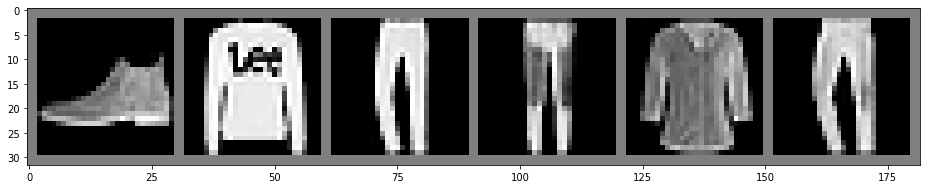

In [ ]:
import torchvision

images, labels = next(iter(test_loader))

imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
import torch
import torch.nn as nn

data = torch.randn((5,5))
print(data)
print(torch.max(data,dim=1))

tensor([[-0.7205,  0.4753,  0.9545,  0.2074, -0.9115],
        [ 0.2129,  1.7860, -0.0034, -0.1935,  0.7375],
        [-1.0982, -1.6311,  0.6847, -0.1747,  0.5744],
        [ 1.6587,  1.1963, -0.1010, -0.5863,  1.0974],
        [-0.7192,  0.0737,  1.3851,  1.1286,  0.8837]])
torch.return_types.max(
values=tensor([0.9545, 1.7860, 0.6847, 1.6587, 1.3851]),
indices=tensor([2, 1, 2, 0, 2]))


In [ ]:
outputs = net(images)
print(outputs)
_,predicetd = torch.max(outputs,1)
print(predicetd)

tensor([[-9.2756e+00, -1.0753e+01, -1.0216e+01,  ..., -4.8321e+00,
         -1.1351e+01, -2.0349e-02],
        [-1.2397e+01, -1.7749e+01, -1.1348e-04,  ..., -3.8425e+01,
         -2.0106e+01, -3.4670e+01],
        [-1.8500e+01, -1.1921e-07, -1.7874e+01,  ..., -3.8147e+01,
         -2.5218e+01, -3.0390e+01],
        ...,
        [-1.2147e-04, -2.0602e+01, -1.0035e+01,  ..., -3.4413e+01,
         -2.3144e+01, -3.7086e+01],
        [-3.8836e+01, -3.6182e+01, -4.5558e+01,  ..., -5.9253e+01,
          0.0000e+00, -5.5740e+01],
        [-7.8661e+00, -8.9610e+00, -4.2332e-01,  ..., -1.1493e+01,
         -9.5182e+00, -1.0270e+01]], grad_fn=<LogSoftmaxBackward0>)
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 9, 6, 7, 2, 1,
        2, 6, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 4, 4, 7, 8, 7, 0,
        2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 2, 

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print(100*correct/total)

90.61


### Cross Entropy의 종류
https://peterleeeeee.github.io/categorical_cross_entropy/


# keras로 수행하기

In [ ]:
import tensorflow as tf

#1. Fashion MNIST 데이터셋 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# 데이터 전처리
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
#3. 모델 구성
def model():
  model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(256, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(512, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),     
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.25),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(10)
  ])

#4. 모델 컴파일
  #SparseCategoricalCrossentropy() 정수로 된 label을 주면 내부적으로 알아서 loss를 계산
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
  return model

In [ ]:
model = model()

In [ ]:
model.summary()

In [ ]:
# 5. 모델 훈령
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 17s 5ms/step - loss: 0.5466 - accuracy: 0.7984
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3536 - accuracy: 0.8698
Epoch 3/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2974 - accuracy: 0.8912
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2599 - accuracy: 0.9038
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2308 - accuracy: 0.9135
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2016 - accuracy: 0.9252
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1814 - accuracy: 0.9311
Epoch 8/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1632 - accuracy: 0.9381
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1473 - accuracy: 0.9451
Epoch 10/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.13

In [ ]:
# 6. 정확도 평가하기
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss, accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.5616 - accuracy: 0.8978
0.5615761876106262 0.8978000283241272


In [ ]:
# 7. 예측하기
import numpy as np
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

313/313 [==============================] - 1s 2ms/step
[-54.51923   -56.526936  -70.96068   -46.045376  -77.923195   -1.3470644
 -53.752544    5.698694  -72.049904   42.771168 ]
9


In [ ]:
len(predictions)

10000